<a href="https://colab.research.google.com/github/saradakantheti-star/Microsoft-Azure-Cost-Analysis/blob/main/LogisticRegression_on_unbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#Importing data
!gdown 1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
dt =pd.read_csv('Spam_finalData.csv')


Downloading...
From: https://drive.google.com/uc?id=1dw56R8SzKgTgiKurfBLUTxmiewJacMkt
To: /content/Spam_finalData.csv
100% 1.64M/1.64M [00:00<00:00, 102MB/s]


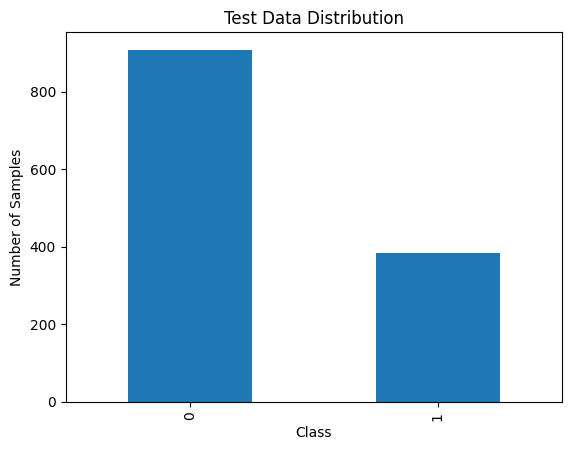

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dt.drop(['label_num'],axis=1),dt['label_num'])

y_test.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Test Data Distribution')
plt.show()

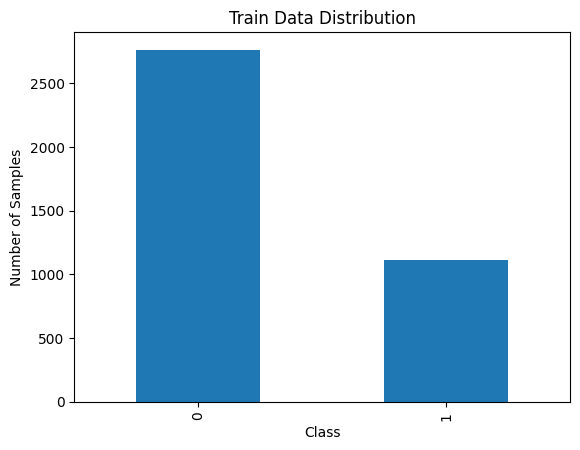

In [7]:
y_train.value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Train Data Distribution')
plt.show()

In [10]:
def training(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)

  train_y_pred=model.predict(X_train)
  test_y_pred=model.predict(X_test)

  train_score = f1_score(y_train,train_y_pred)
  test_score = f1_score(y_test,test_y_pred)

  return train_score,test_score

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model=LogisticRegression(class_weight={0:1,1:2.37})

f1_train,f1_test=training(model,X_train,y_train,X_test,y_test)
print(f'Training F1 score: {f1_train},Testing F1 score: {f1_test}')

Training F1 score: 0.8448012232415902,Testing F1 score: 0.854586129753915


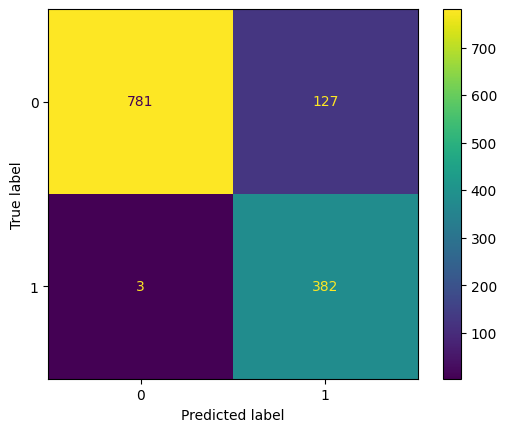

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
model1=LogisticRegression()

f2_train,f2_test=training(model1,X_train,y_train,X_test,y_test)
print(f'Training F2 score: {f2_train},Testing F2 score: {f2_test}')

Training F2 score: 0.8878544223444773,Testing F2 score: 0.8916562889165629


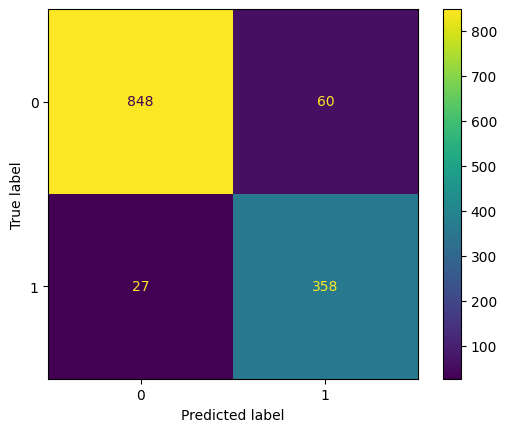

In [13]:
y_pred = model1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional)
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on the test set: {accuracy:.2f}")

# Make predictions (optional)
predictions = model.predict(X_test)
print("\nSample predictions:")
print(predictions[:10])